In [135]:
import numpy as np
import matplotlib.pyplot as plt

#Orthogonal Regression

In [316]:
def orthogonal_regression(A):
  n = A.shape[1]
  m = A.shape[0]
  e = np.ones(m)

  Q = A.T @ (np.eye(m)-(1/m)*(np.outer(e,e))) @ A
  eigenvalues, eigenvectors = np.linalg.eig(Q)
  min_index = np.argmin(eigenvalues)
  optimal_value = eigenvalues[min_index]
  print("min eigenvalue: ", optimal_value)
  print("min eigenvector: ", eigenvectors[:, min_index])
  p = eigenvectors[:, min_index]
  alpha = 0
  for i in range(m):
    alpha += p @ A[i]
  alpha /= m
  return p,alpha


In [317]:
def plot_hyperplane(A,p,alpha):
  plt.scatter(A[:, 0], A[:, 1], color='blue', label='Sample Points')
  x = np.linspace(min(A[:, 0]), max(A[:, 0]), 1000)
  y = (alpha - p[0]*x)/p[1]
  plt.plot(x, y, color='red', label=f'Hyperplane $p^T a = alpha$')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Orthogonal Regression')
  plt.legend()
  plt.grid(True)
  plt.show()

#Reading the data


##Dataset 1

min eigenvalue:  1.0460243216377645
min eigenvector:  [-0.74165381  0.67078285]


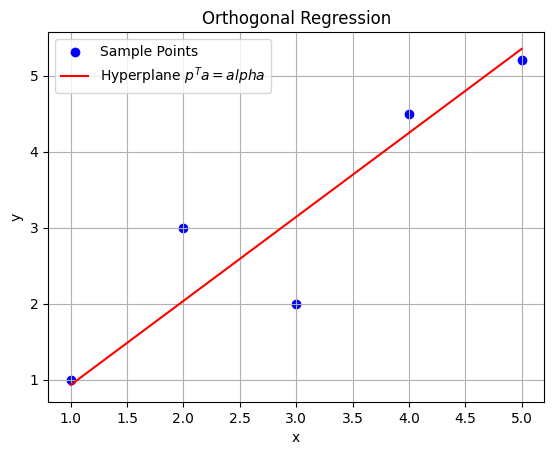

In [319]:
data_file_name_1 = 'data1.txt'
A = np.loadtxt(data_file_name_1)
p,alpha = orthogonal_regression(A)
plot_hyperplane(A,p,alpha)

##Dataset 2

min eigenvalue:  1.270556467507248
min eigenvector:  [-0.85557668  0.51767611]


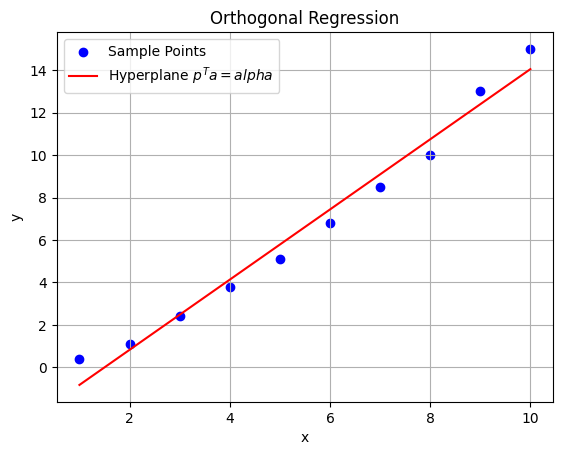

In [320]:
data_file_name_2 = 'data2.txt'
A = np.loadtxt(data_file_name_2)

p,alpha = orthogonal_regression(A)
plot_hyperplane(A,p,alpha)

#Predicting House Prices in Boston

##Data split


In [321]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('boston.csv')
train , test = train_test_split(data, test_size = 0.2, random_state=40)
feature_train = train['RM'].values
label_train = train['MEDV'].values
feature_test = test['RM'].values
label_test = test['MEDV'].values

In [323]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##Train

min eigenvalue:  92.68156772351358
min eigenvector:  [-0.99854704  0.05388709]


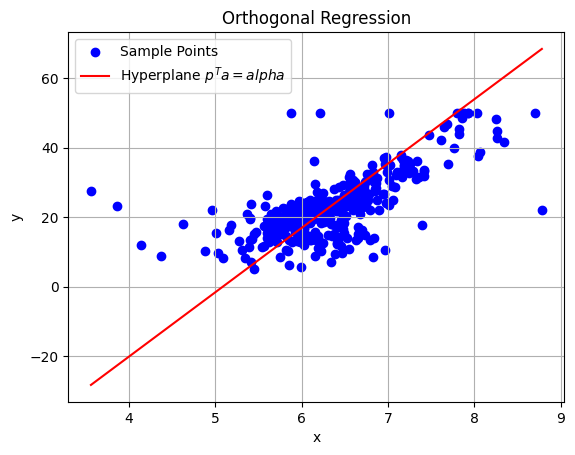

In [324]:
A = np.vstack((feature_train, label_train)).T
p , alpha = orthogonal_regression(A)
plot_hyperplane(A, p, alpha)

##Test

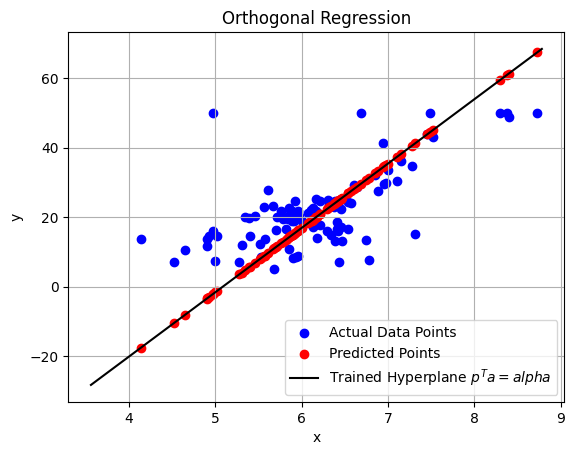

In [325]:
actual_points = np.vstack((feature_test, label_test)).T
predicted_prices =(alpha - p[0]*feature_test)/p[1]
predicted_points = np.vstack((feature_test, predicted_prices)).T

def plot_test_results(predicted_points, actual_points,  A, p, alpha):
  plt.scatter(actual_points[:, 0], actual_points[:, 1], color='blue', label='Actual Data Points')
  plt.scatter(predicted_points[:, 0], predicted_points[:, 1], color='red', label='Predicted Points')
  x = np.linspace(min(A[:, 0]), max(A[:, 0]), 1000)
  y = (alpha - p[0]*x)/p[1]
  plt.plot(x, y, color='black', label=f'Trained Hyperplane $p^T a = alpha$')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Orthogonal Regression')
  plt.legend()
  plt.grid(True)
  plt.show()


plot_test_results(predicted_points, actual_points, A, p, alpha)

##Calculating Error

In [326]:
def MSE(predicted_prices, actual_prices):
  n = actual_prices.shape[0]
  squared_err = 0
  for i in range(n):
    squared_err += (predicted_prices[i] - actual_prices[i])**2
  mse = squared_err/n
  return mse
print("MSE: ", MSE(predicted_prices, label_test))

MSE:  121.38188260633544


##Using more features

###Training


In [328]:
feature_train = train[['RM', 'AGE', 'TAX']].values
label_train = train['MEDV'].values
feature_test = test[['RM', 'AGE', 'TAX']].values
A = np.column_stack((feature_train, label_train))
p , alpha = orthogonal_regression(A)

min eigenvalue:  91.98910537811004
min eigenvector:  [-9.98387899e-01  5.02726008e-04  2.39025380e-04  5.67564318e-02]


###Testing

In [331]:
def predict_price(p, alpha, x):
  tmp = p[:-1]
  tmp_T = tmp.reshape(1, tmp.shape[0])
  return ((alpha - (tmp_T)@x.T)/ p[-1]).reshape(x.shape[0])

predicted_prices = predict_price(p, alpha, feature_test)
err = MSE(predicted_prices, label_test)
print("MSE: ", err)

MSE:  110.78161757092836
